In [100]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import pandas_profiling

In [101]:
data=pd.read_excel(r'C:\Users\Ramki\Downloads\Trip Data..xlsx', sheet_name='VTS Data 280820')
data.shape

(6880, 32)

In [102]:
pd.set_option('max_columns', 50)
data.head(5)

GpsProvider           BookingID Market/Regular           BookingID_Date  \
0  CONSENT TRACK  MVCV0000927/082021          Market 2020-08-17 14:59:01.000   
1        VAMOSYS  VCV00014271/082021         Regular 2020-08-27 16:22:22.827   
2  CONSENT TRACK  VCV00014382/082021         Regular 2020-08-27 17:59:24.987   
3        VAMOSYS  VCV00014743/082021         Regular 2020-08-28 00:48:24.503   
4        VAMOSYS  VCV00014744/082021         Regular 2020-08-28 01:23:19.243   

   vehicle_no                                    Origin_Location  \
0    KA590408               TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU   
1  TN30BC5917  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
2  TN22AR2748              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   
3  TN28AQ0781  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...   
4   TN68F1722              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY   

                                Destination_Location      Org_lat_lon  \
0       ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA  13.1550,80.1960   
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8710,79.7390   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...  12.8390,79.9540   
4              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY  11.8720,79.6320   

       Des_lat_lon      Data_Ping_time             Planned_ETA  \
0  12.7400,77.8200 2020-08-24 00:05:09 2020-08-21 18:59:01.000   
1  12.8390,79.9540 2020-08-28 12:40:28 2020-08-31 20:22:22.827   
2  11.8710,79.7390 2020-08-28 09:05:09 2020-08-31 21:59:24.987   
3  12.8390,79.9540 2020-08-28 12:40:31 2020-09-01 04:48:24.503   
4  11.8720,79.6320 2020-08-28 12:40:29 2020-09-01 05:23:19.243   

                                    Current_Location  \
0  Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...   
1  Unnamed Road, Oragadam Industrial Corridor, Va...   
2  570, National Hwy 48, Shenoy Nagar, Chennai, T...   
3  Singaperumal Koil - Sriperumbudur Rd, Oragadam...   
4            Melmaruvathur, Tamil Nadu 603319, India   

                                 DestinationLocation              actual_eta  \
0       ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA 2020-08-28 14:38:04.447   
1  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,... 2020-08-28 12:46:17.007   
2              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY 2020-08-28 16:03:30.793   
3  DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,... 2020-08-28 12:50:27.997   
4              LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY 2020-08-28 14:22:50.127   

    Curr_lat   Curr_lon ontime delay OriginLocation_Code  \
0  12.663500  78.649870    NaN     R       CHEPUZTVSHUA1   
1  12.836757  79.954428      G   NaN       CHEORADMRCCB1   
2  13.073956  80.225780      G   NaN       CHEPONLUTCCA4   
3  12.836686  79.950560      G   NaN       CHEORADMRCCB1   
4  12.429501  79.831556      G   NaN       CHENETLUTCCA1   

  DestinationLocation_Code     trip_start_date trip_end_date  \
0            HOSHOSALLCCA2 2020-08-17 14:59:01           NaT   
1            CHEMATDMROPA7 2020-08-27 16:21:52           NaT   
2            CHEPONLUTCCA4 2020-08-27 17:57:04           NaT   
3            CHEMATDMROPA7 2020-08-28 00:47:45           NaT   
4            CHENETLUTCCA1 2020-08-28 01:13:48           NaT   

   TRANSPORTATION_DISTANCE_IN_KM vehicleType  \
0                          320.0         NaN   
1                          103.0         NaN   
2                          300.0         NaN   
3                           61.0         NaN   
4                          240.0         NaN   

   Minimum_kms_to_be_covered_in_a_day Driver_Name  Driver_MobileNo  \
0                                 NaN         NaN              NaN   
1                                 NaN      RAMESH              NaN   
2                                 NaN        GIRI              NaN   
3                                 NaN        RAVI              NaN   
4                                 NaN       TAMIL              NaN   

   cu

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [104]:
#making a copy of data before preprocessing
data_raw=data.copy()

In [105]:
pandas_profiling.ProfileReport(data)

In [106]:
data.sort_values('trip_start_date').head(5)

GpsProvider     BookingID Market/Regular       BookingID_Date  \
6868       JTECH  WDSBKTP44502         Regular 2019-04-15 15:15:13   
6264         NaN  WDSBKTP49392         Regular 2019-06-10 13:17:44   
5910         NaN  WDSBKTP41957         Regular 2019-03-18 12:19:22   
6631         NaN  WDSBKTP41973         Regular 2019-03-18 16:24:18   
5912         NaN  WDSBKTP41974         Regular 2019-03-18 16:56:02   

      vehicle_no                       Origin_Location  \
6868   KA21A5090  Mugabala, Bangalore Rural, Karnataka   
6264   WB59B9152           Sonai, Kolkata, West Bengal   
5910  AP26TE1258                      Sedarapet, India   
6631  TN20AJ1188        Kanchipuram, Tamil Nadu, India   
5912  TN25AT7677                      Sedarapet, India   

                               Destination_Location  \
6868  Peenya Small Industries, Bangalore, Karnataka   
6264                    Kalyani, Nadia, West Bengal   
5910           Redhills, Chennai, Tamil Nadu, India   
6631                 Periyapatti, Tamil Nadu, India   
5912        Mylasandra, Bengaluru, Karnataka, India   

                                Org_lat_lon  \
6868  16.560192249175344,80.792293091599547   
6264  23.525267916088961,87.264424348570884   
5910              12.0001,79.74839949999999   
6631                  12.8341735,79.7036402   
5912              12.0001,79.74839949999999   

                                Des_lat_lon      Data_Ping_time  \
6868  13.196312912801169,77.708156925688726 2019-06-14 15:20:12   
6264    22.952176370977448,88.4571405591546                 NaT   
5910                   13.1992334,80.196693                 NaT   
6631                  11.2044996,78.1421905                 NaT   
5912                   12.853929,77.6178125                 NaT   

             Planned_ETA                                   Current_Location  \
6868 1899-12-30 04:06:00  Shed No 60, Medahalli Kadugodi Road, Virgonaga...   
6264 1899-12-30 08:58:00                                                NaN   
5910 2019-03-19 11:45:22                                                NaN   
6631 2019-03-20 18:00:18                                                NaN   
5912 2019-03-20 12:38:02                                                NaN   

                                DestinationLocation          actual_eta  \
6868  Peenya Small Industries, Bangalore, Karnataka 1899-12-30 03:21:00   
6264                    Kalyani, Nadia, West Bengal 1899-12-30 08:13:00   
5910           Redhills, Chennai, Tamil Nadu, India 2019-03-19 11:00:22   
6631                 Periyapatti, Tamil Nadu, India 2019-03-20 17:15:18   
5912        Mylasandra, Bengaluru, Karnataka, India 2019-03-20 11:53:02   

       Curr_lat   Curr_lon ontime delay OriginLocation_Code  \
6868  13.025077  77.723114    NaN     R           V0048673    
6264        NaN        NaN      G   NaN           V0045772    
5910        NaN        NaN      G   NaN       CHESEDLTLCCA1   
6631        NaN        NaN      G   NaN       CHEMANLTLWHA1   
5912        NaN        NaN      G   NaN       CHESEDLTLCCA1   

     DestinationLocation_Code     trip_start_date       trip_end_date  \
6868                 LE005419 1899-12-30 00:00:00 1899-12-30 03:21:00   
6264                 LE005821 1899-12-30 00:00:00 1899-12-30 08:13:00   
5910            CHEVADTDUCCA1 2019-03-18 12:19:22 2019-03-19 11:00:22   
6631            CHEPARPUBTPA1 2019-03-18 16:24:18 2019-03-20 17:15:18   
5912            HOSBYALTLWHA1 2019-03-18 16:56:02 2019-03-20 11:53:02   

      TRANSPORTATION_DISTANCE_IN_KM                               vehicleType  \
6868                           41.0                    40 FT 3XL Trailer 35MT   
6264                           51.0  40 FT Flat Bed Multi-Axle 27MT - Trailer   
5910                            NaN         24 | 26 FT Taurus Open 21MT - HCV   
6631                            NaN              22 FT Taurus Open 16MT - HCV   
5912                            NaN         24 | 26 FT Taurus Open 21

In [107]:
#6868,6264 index rows having years as 1899 in all datetime features, may be it's a mistake
#As we have mistake in those 2 rows let's remove those
data.drop(data.index[[6868,6264]], inplace=True)

In [108]:
#let's create as a single column 'ontime/delay' from 'ontime' and 'delay' columns
data['ontime/delay']=data.ontime.replace({np.NaN, 'G'}, {0, 1})

In [109]:
data['vehicle_states'] = data.vehicle_no.astype(str).str[:2]
data['Origin_states'] = data['Origin_Location'].str.split(',').apply(lambda x: x[-1])
data['Dest_states'] = data['Destination_Location'].str.split(',').apply(lambda x: x[-1])

In [110]:
data['vehicle_states']=data['vehicle_states'].replace(('tn', 'hr'), ('TN', 'HR'))

data['Origin_states']=data['Origin_states'].replace((' Maharashtra', 'TAMIL NADU', ' Gujarat', ' Tamil Nadu',
                                                     'RAJASTHAN', ' Haryana', 'PONDICHERRY',
                                                     ' Karnataka', 'KARNATAKA', 'GUJARAT', 'HARYANA', ' Rajasthan', 
                                                     ' Uttar Pradesh', ' Pondicherry', ' West Bengal', ' Odisha',
                                                     ' Jharkhand', ' Bihar', ' Assam', ' Andhra Pradesh', ' Telangana',
                                                     ' Chattisgarh', ' Delhi', ' Kerala', ' Chandigarh', ' India', 
                                                     'UTTAR PRADESH'),
                                                    ('Maharashtra', 'Tamil Nadu', 'Gujarat', 'Tamil Nadu',
                                                     'Rajasthan', 'Haryana', 'Pondicherry',
                                                     'Karnataka', 'Karnataka', 'Gujarat', 'Haryana', 'Rajasthan',
                                                     'Uttar Pradesh', 'Pondicherry', 'West Bengal', 'Odisha',
                                                     'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
                                                     'Chattisgarh', 'Delhi', 'Kerala', 'Chandigarh', 'India',
                                                     'Uttar Pradesh'))

data['Dest_states']=data['Dest_states'].replace((' Tamil Nadu', 'TAMIL NADU', 'RAJASTHAN', ' Maharashtra',
       'KARNATAKA', 'PONDICHERRY', 'MAHARASHTRA', ' Haryana', ' Gujarat',
       'GUJARAT', 'JHARKHAND', 'Haryana', ' Himachal Pradesh',
       ' Karnataka', ' Assam', 'HARYANA', ' Uttar Pradesh',
       'HIMACHAL PRADESH', ' West Bengal', ' Odisha', ' Rajasthan',
       ' Andhra Pradesh', ' Jharkhand', ' Telangana', ' Punjab', ' Delhi',
       ' Central Development Region', ' Madhya Pradesh', ' Meghalaya',
       ' Chattisgarh', ' Jammu & Kashmir', ' Uttarakhand', ' Chandigarh',
       ' Bihar', ' Pondicherry', ' Kerala', ' Dadra & Nagar Haveli',
       ' Goa', ' Sikkim', ' India'),
       ('Tamil Nadu', 'Tamil Nadu', 'Rajasthan', 'Maharashtra',
       'Karnataka', 'Pondicherry', 'Maharashtra', 'Haryana', 'Gujarat',
       'Gujarat', 'Jharkhand', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Assam', 'Haryana', 'Uttar Pradesh',
       'Himachal Pradesh', 'West Bengal', 'Odisha', 'Rajasthan',
       'Andhra Pradesh', 'Jharkhand', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Pondicherry', 'Kerala', 'Dadra & Nagar Haveli',
       'Goa', 'Sikkim', 'India'))

In [111]:
for i in data.index:
  if data['Origin_states'][i]=='India':
    if data['Origin_Location'][i]=='Sedarapet, India':
      data['Origin_states'][i]='Pondicherry'
    elif data['Origin_Location'][i]=='Kanchipuram, Tamil Nadu, India':
      data['Origin_states'][i]='Tamil Nadu'
    elif data['Origin_Location'][i]=='Karnataka 562114, India':
      data['Origin_states'][i]='Karnataka'
    elif data['Origin_Location'][i]=='Sedarapet, Pondicherry, India':
      data['Origin_states'][i]='Pondicherry'
    elif data['Origin_Location'][i]=='Pondicherry, Puducherry, India':
      data['Origin_states'][i]='Pondicherry'

In [112]:
for i in data.index:
  if data['Dest_states'][i]=='India':
    if data['Destination_Location'][i]=='Gaya, Bihar, India':
      data['Origin_states'][i]='Bihar'
    elif data['Destination_Location'][i]=='Nizamabad, Telangana, India':
      data['Origin_states'][i]='Telangana'
    elif data['Destination_Location'][i]=='Bhogipur, Uttar Pradesh, India':
      data['Origin_states'][i]='Uttar Pradesh'
    elif data['Destination_Location'][i]=='Pondicherry, Puducherry, India':
      data['Origin_states'][i]='Pondicherry'
    elif data['Destination_Location'][i]=='Sheikhpura, Bihar, India':
      data['Origin_states'][i]='Bihar'
    elif data['Destination_Location'][i]=='Bhagalpur, Bihar, India':
      data['Origin_states'][i]='Bihar'
    elif data['Destination_Location'][i]=='Kothamangalam, Kerala, India':
      data['Origin_states'][i]='Kerala'
    elif data['Destination_Location'][i]=='Kanchipuram, Tamil Nadu, India':
      data['Origin_states'][i]='Tamil Nadu'

In [113]:
from geopy import distance

#let's find the distance between origin and destination
distances_km = []
for row in data.itertuples(index=False):
   distances_km.append(
       distance.distance(row.Org_lat_lon, row.Des_lat_lon).km
   )

data['Org_Dest_distance'] = distances_km
#df_dist.head()

#data=pd.concat([data, df_dist])

### Missing value Treatment

In [114]:
#let's check the percentage of null values in each feature
for col in data.columns:
    if data[col].isna().sum()>0:
        print(col, data[col].isna().mean().round(4)*100)

GpsProvider 13.84
Data_Ping_time 13.84
Current_Location 14.000000000000002
actual_eta 0.54
Curr_lat 13.84
Curr_lon 13.84
ontime 62.970000000000006
delay 36.89
OriginLocation_Code 0.04
DestinationLocation_Code 0.38999999999999996
trip_end_date 2.82
TRANSPORTATION_DISTANCE_IN_KM 10.35
vehicleType 12.04
Minimum_kms_to_be_covered_in_a_day 59.0
Driver_Name 49.830000000000005
Driver_MobileNo 60.88


In [115]:
#let's name unkown for null values in driver name
data['Driver_Name']=data['Driver_Name'].fillna('Unknown')

#let's impute transportation distence with mean value
data['TRANSPORTATION_DISTANCE_IN_KM']= data["TRANSPORTATION_DISTANCE_IN_KM"].rolling(min_periods=1, center=True, window=12).mean()

#let's name unkown for null values in vehicle type
data['vehicleType']=data['vehicleType'].fillna('Unknown')

#let's fill pervious date for actual.eta
data['actual_eta']=data['actual_eta'].fillna(method='ffill')

In [116]:
#let's impute null values in trip_end_date
import datetime
import random
df_sub=data[data['trip_end_date'].isna()]
for i in df_sub.index:
  if df_sub['ontime/delay'][i]==0:
    df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
  else:
    df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

data=pd.concat([data, df_sub])

#as we have concatinationg those null in trip_end_date related rows are duplicates so let's remove those
data.dropna(subset=['trip_end_date'], inplace=True)

In [117]:
#feature like gps provider, data ping time, current location, curr_lat, curr_lon having null values in same rows
#all the above mentioned features are dependent on each other and it's not feasible to impute those, so let's drop those rows

data.dropna(subset=['Current_Location'], inplace=True)

### Let's explore the data

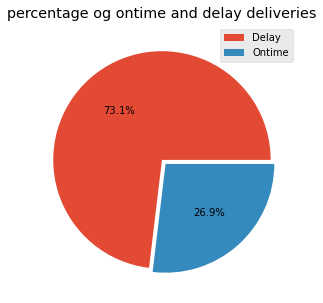

In [118]:
plt.rcParams['figure.figsize']=(5,5)
#explode = (0, 0.1, 0.2, 0.3, 0.4)
plt.pie(data['ontime/delay'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('percentage og ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

In [119]:
print('star supliers with more no. of ontime delivery')
data[data['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with more no. of ontime delivery


In [120]:
print('star supliers with more no. of ontime delivery')
data[data['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with more no. of ontime delivery


In [121]:
print('star supliers with more no. of delay delivery')
data[data['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with more no. of delay delivery


In [122]:
print('star supliers with more no. of delay delivery')
data[data['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with more no. of delay delivery


In [123]:
#Let's check the supplier code for the unknown suppliers
data[data['supplierNameCode']=='Unknown']['supplierID'].value_counts()

999    316
Name: supplierID, dtype: int64

In [124]:
# Let's check whether having driver's mobile number making any impact on ontime delivery
data['Driver_MobileNo'].values[data['Driver_MobileNo'].values>0]=1
data['Driver_MobileNo'].fillna(0, inplace=True)
data[data['Driver_MobileNo']==1]['ontime/delay'].value_counts()

0    2003
1     677
Name: ontime/delay, dtype: int64

In [125]:
data[data['Driver_MobileNo']==0]['ontime/delay'].value_counts()

0    2321
1     914
Name: ontime/delay, dtype: int64

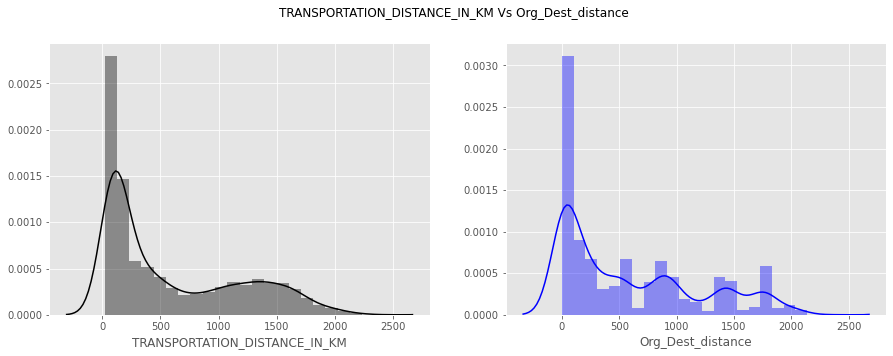

In [126]:
#let's check the pattern of 'transportation in km' vs 'distance between origin and destination'
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
sns.distplot(data['TRANSPORTATION_DISTANCE_IN_KM'], color='black')

plt.subplot(122)
sns.distplot(data['Org_Dest_distance'], color='blue')

plt.suptitle('TRANSPORTATION_DISTANCE_IN_KM Vs Org_Dest_distance')
plt.show()

In [127]:
#fraudulant entries by suppliers
data[data['Org_Dest_distance']==0][['TRANSPORTATION_DISTANCE_IN_KM', 'supplierNameCode']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='plasma')

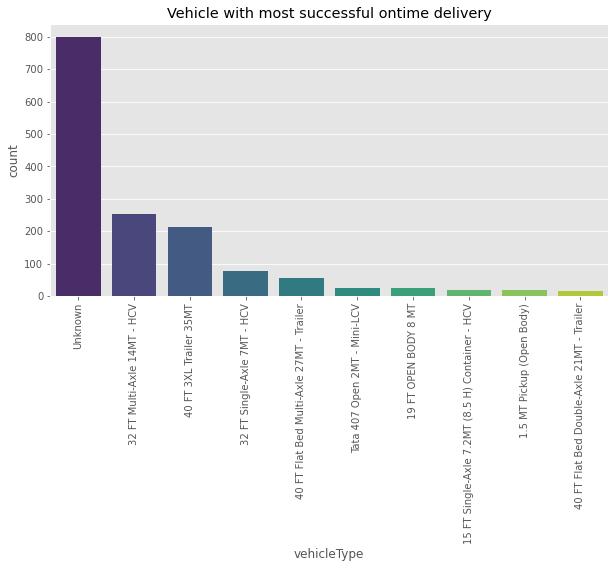

In [128]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data[data['ontime/delay']==1]['vehicleType'],
             order=data[data['ontime/delay']==1]['vehicleType'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('Vehicle with most successful ontime delivery')
plt.show()

By this result, we can see that we don't have vehicletype data for most of the record. Definetly we shoud have record of vehicle type to get the suppliers having star vehicle. By this we can see the second most successful star vehicle which making more number of ontime delivery is '*32 FT Multi-Axle 14MT - HCV*'



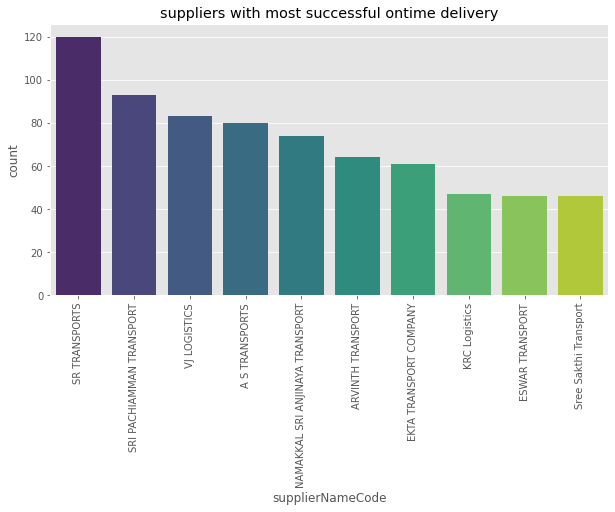

In [129]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data[data['ontime/delay']==1]['supplierNameCode'],
             order=data[data['ontime/delay']==1]['supplierNameCode'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('suppliers with most successful ontime delivery')
plt.show()

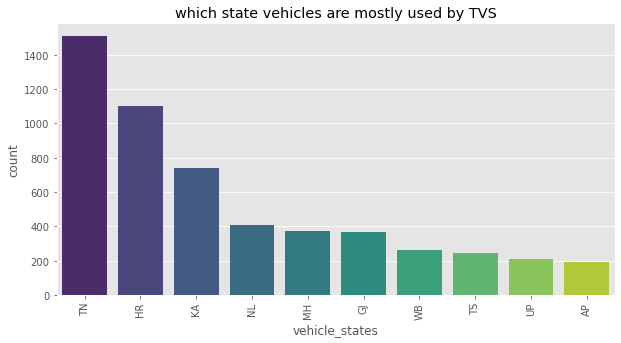

In [130]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data['vehicle_states'],
             order=data['vehicle_states'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('which state vehicles are mostly used by TVS')
plt.show()

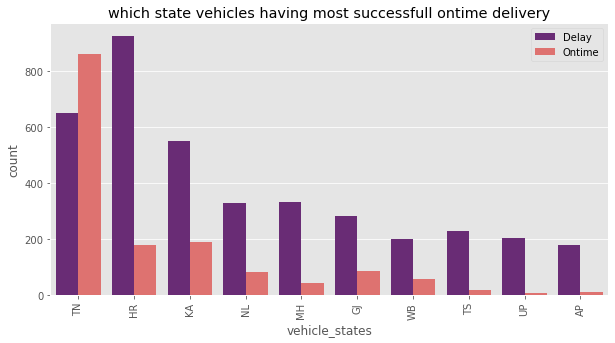

In [131]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(data['vehicle_states'],
             order=data['vehicle_states'].value_counts().head(10).index,
              hue=data['ontime/delay'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which state vehicles having most successfull ontime delivery')
plt.legend(['Delay', 'Ontime'])
plt.show()

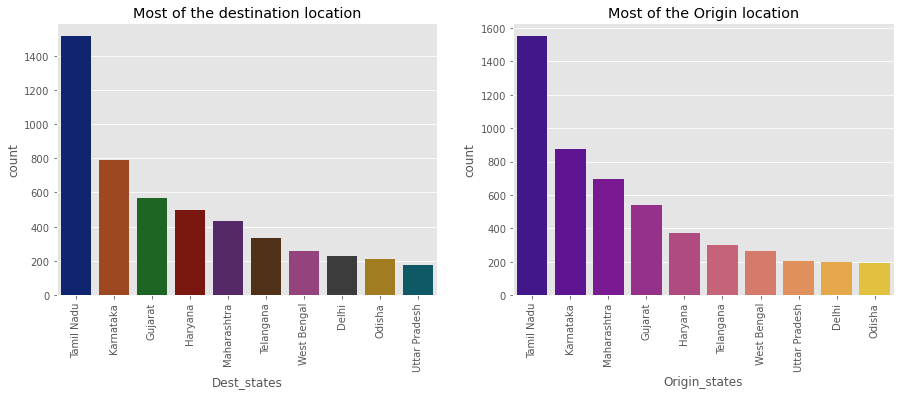

In [132]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
sns.countplot(data['Dest_states'],
             order=data['Dest_states'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the destination location')

plt.subplot(122)
sns.countplot(data['Origin_states'],
             order=data['Origin_states'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Origin location')

plt.show()

### Outlier Treatment

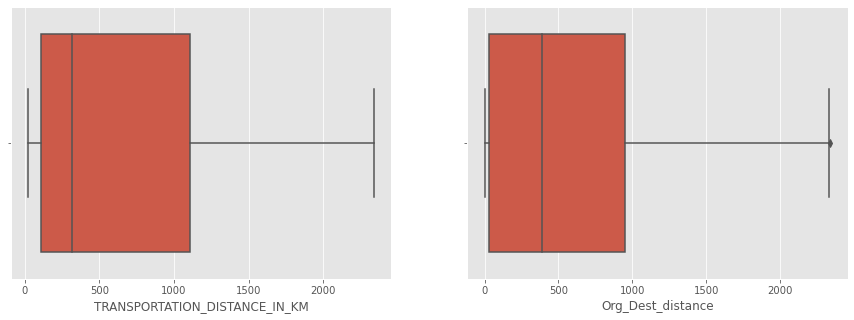

In [133]:
plt.subplot(121)
sns.boxplot(data['TRANSPORTATION_DISTANCE_IN_KM'])

plt.subplot(122)
sns.boxplot(data['Org_Dest_distance'])
plt.show()

we don't have major outliers in our data

In [134]:
#as we don't have outliers we don't need the below code
#q1=df_cln['TRANSPORTATION_DISTANCE_IN_KM'].quantile(0.25)
#q3=df_cln['TRANSPORTATION_DISTANCE_IN_KM'].quantile(0.75)

#let's cap the outliers with max threshold value
#IQR=q3-q1
#max_thres=q3+1.5*IQR

#df_cln['TRANSPORTATION_DISTANCE_IN_KM'].values[df_cln['TRANSPORTATION_DISTANCE_IN_KM'].values>max_thres]=max_thres

### Feature Encoding

In [135]:
#let's filter usefull data alone
df_cln=data[['Market/Regular ',
       'vehicle_no',
       'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID',
       'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [136]:
#let's make a copy of filtered data
df_copy=df_cln.copy()

In [137]:
#df_cln['GpsProvider']=df_cln.GpsProvider.astype("category").cat.codes
#df_cln['BookingID']=df_cln.BookingID.astype("category").cat.codes
df_cln['vehicle_no']=df_cln.vehicle_no.astype("category").cat.codes
df_cln['customerID']=df_cln.customerID.astype("category").cat.codes
df_cln['supplierID']=df_cln.supplierID.astype("category").cat.codes
#df_cln['Origin_Location']=df_cln.Origin_Location.astype("category").cat.codes
#df_cln['Destination_Location']=df_cln.Destination_Location.astype("category").cat.codes
df_cln['Current_Location']=df_cln.Current_Location.astype("category").cat.codes
df_cln['vehicleType']=df_cln.vehicleType.astype("category").cat.codes
#df_cln['customerNameCode']=df_cln.customerNameCode.astype("category").cat.codes
#df_cln['supplierNameCode']=df_cln.supplierNameCode.astype("category").cat.codes
df_cln['Material Shipped']=df_cln['Material Shipped'].astype("category").cat.codes
df_cln['Market/Regular ']=df_cln['Market/Regular '].astype("category").cat.codes
df_cln['Driver_Name']=df_cln['Driver_Name'].astype("category").cat.codes
df_cln['vehicle_states']=df_cln.vehicle_states.astype("category").cat.codes
df_cln['Origin_states']=df_cln['Origin_states'].astype("category").cat.codes
df_cln['Dest_states']=df_cln['Dest_states'].astype("category").cat.codes

In [138]:
corr_matrix=df_cln.corr()
corr_matrix["ontime/delay"].sort_values(ascending=False)

ontime/delay                     1.000000
supplierID                       0.501116
vehicleType                      0.210720
vehicle_states                   0.203893
vehicle_no                       0.201877
Dest_states                      0.177922
Origin_states                    0.110959
TRANSPORTATION_DISTANCE_IN_KM    0.104201
Current_Location                 0.075365
Material Shipped                 0.013946
Driver_MobileNo                 -0.033591
Market/Regular                  -0.125841
Org_Dest_distance               -0.233739
Driver_Name                     -0.244567
customerID                      -0.258463
Name: ontime/delay, dtype: float64

In [139]:
x=df_cln.drop('ontime/delay', axis=1)
y=df_cln['ontime/delay'].values

### Scaling Treatment

In [140]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(x)
x_scl=pd.DataFrame(scaled, columns=x.columns)

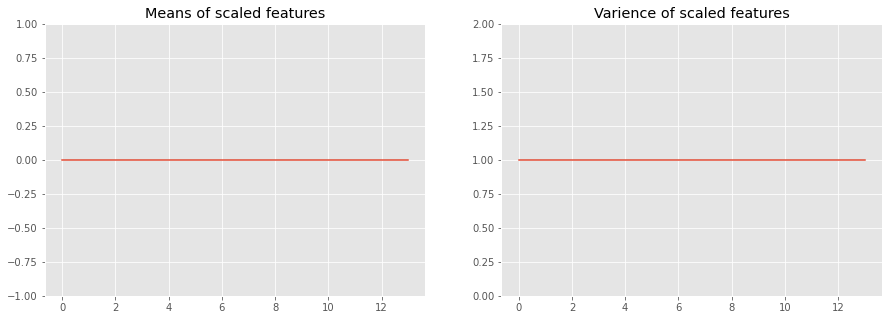

In [141]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

dataset is well standardised

### Model Building

#### Logistic Refression

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.25)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [144]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [145]:
LR.score(X_test, y_test)

0.8471940500338067

In [146]:
y_pred_LR=LR.predict(X_test)

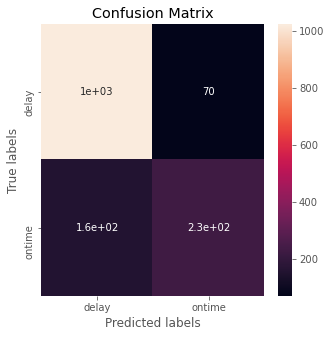

In [147]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [148]:
fpr, tpr, thres = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

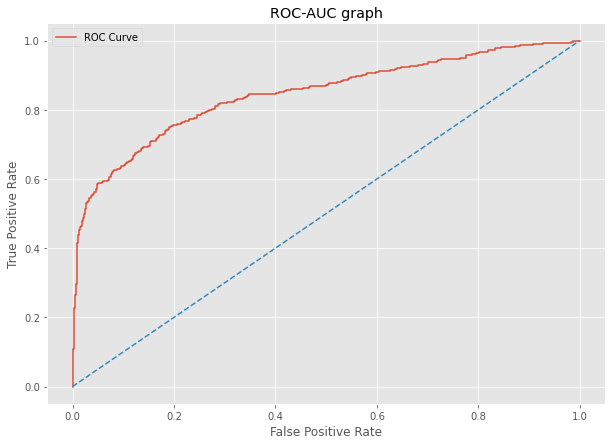

In [149]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

#### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel

In [160]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [161]:
RF =RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [162]:
RF.score(X_test, y_test)

0.9026369168356998

In [163]:
y_pred_RF=RF.predict(X_test)

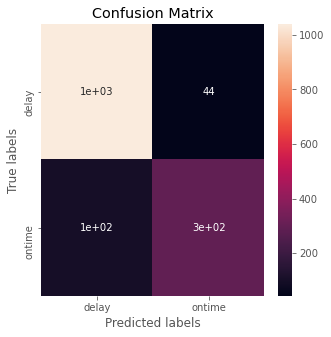

In [164]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [165]:
fpr, tpr, thres = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

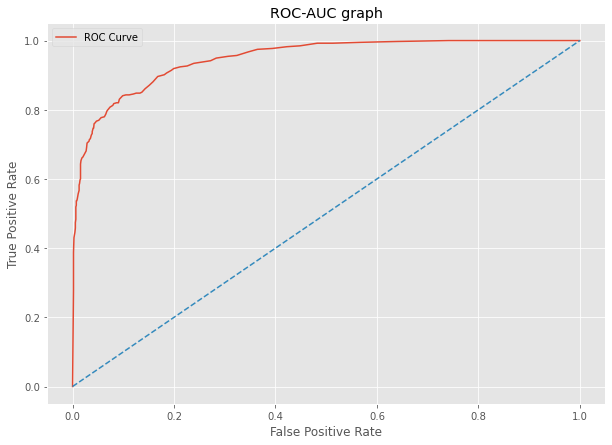

In [166]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

#### Selecting most helping Parametes

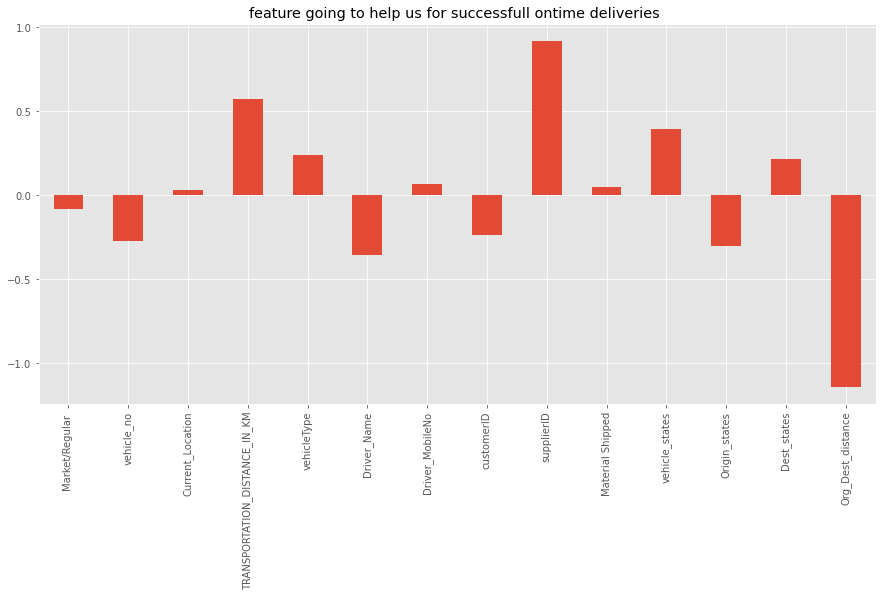

In [167]:
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(LR.coef_[0], index=['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID', 'Material Shipped',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull ontime deliveries ')
fig=params_weight.get_figure()
plt.show()

**Parameters that impact on ontime delivery**
* Current location
* Transportation distance
* Vehicle state
* Vehicle type
* Driver mobile number
* Supplier
* material shipped
* Destination state

In [176]:
#from sklearn.feature_selection import RFECV

In [177]:
#rfecv=RFECV(LR, step=1, min_features_to_select=8, n_jobs=-1)
#rfecv.fit(X_train, y_train)

In [178]:
#selected_features=np.where(rfecv.support_)[0]
#X_train_select=X_train.iloc[:,selected_features]
#X_test_select=X_test.iloc[:, selected_features]

In [179]:
#X_train_select.columns

In [180]:
#LR.fit(X_train_select, y_train)

In [181]:
#LR.score(X_test_select, y_test)

In [182]:
#y_pred_select_LR=LR.predict(X_test_select)
#confusion_matrix(y_test, y_pred_select_LR)

In [184]:
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [185]:
'''model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','poly','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,10,20]
            solver='liblinear'
        }
    },
    'Gaussian_NB':{
        'model':GaussianNB(),
        'params':{}
    },
    'Decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['random','best']
        }
    }
}'''

"model_params={\n    'svm':{\n        'model':SVC(gamma='auto'),\n        'params':{\n            'C':[1,10,20],\n            'kernel':['rbf','poly','linear']\n        }\n    },\n    'random_forest':{\n        'model':RandomForestClassifier(),\n        'params':{\n            'n_estimators':[1,5,10]\n        }\n    },\n    'logistic_regression':{\n        'model':LogisticRegression(),\n        'params':{\n            'C':[1,10,20]\n            solver='liblinear'\n        }\n    },\n    'Gaussian_NB':{\n        'model':GaussianNB(),\n        'params':{}\n    },\n    'Decision_tree':{\n        'model':DecisionTreeClassifier(),\n        'params':{\n            'criterion':['gini','entropy'],\n            'splitter':['random','best']\n        }\n    }\n}"

In [186]:
#from sklearn.model_selection import RandomizedSearchCV

In [187]:
"""scores=[]
for model_name,mp in model_params.items():
    rs=RandomizedSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False,n_iter=3)
    rs.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':rs.best_score_,
        'best_params':rs.best_params_
    })"""

"scores=[]\nfor model_name,mp in model_params.items():\n    rs=RandomizedSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False,n_iter=3)\n    rs.fit(X_train,y_train)\n    scores.append({\n        'model':model_name,\n        'best_score':rs.best_score_,\n        'best_params':rs.best_params_\n    })"

In [188]:
#scores_df=pd.DataFrame(scores)
#scores_df

In [192]:
#sel=SelectFromModel(RandomForestClassifier())
#sel.fit(X_train, y_train)
#sel.get_support()

In [193]:
#selected_features=np.where(sel.get_support())[0]
#X_train_select=X_train.iloc[:,selected_features]
#X_test_select=X_test.iloc[:, selected_features]